In [155]:
import pandas as pd
import numpy as np
import requests
import geopandas as gpd
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import lxml
import html5lib

import re

from shapely.geometry import Point

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm, trange

print('Libraries imported.')

Libraries imported.


In [2]:
sns.set()

In [3]:
def get_coord(address):

    geolocator = Nominatim(user_agent="to_explorer")
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print(f'The geograpical coordinate of {address} are {latitude:.2f}, {longitude:.2f}.')
        return latitude, longitude
    except:
        return None, None

# Import Data

In [4]:
gdf_ny = gpd.read_file('../data/nyu-2451-34572-shapefile/nyu_2451_34572.shp')

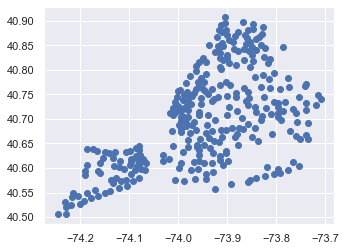

In [5]:
gdf_ny.plot()

In [6]:
gdf_ny.head()

,name,stacked,annoline1,annoline2,annoline3,annoangle,borough,geometry
0,Wakefield,1,Wakefield,None,None,0.0,Bronx,POINT (-73.84720 40.89471)
1,Co-op City,2,Co-op,City,None,0.0,Bronx,POINT (-73.82994 40.87429)
2,Eastchester,1,Eastchester,None,None,0.0,Bronx,POINT (-73.82781 40.88756)
3,Fieldston,1,Fieldston,None,None,0.0,Bronx,POINT (-73.90564 40.89544)
4,Riverdale,1,Riverdale,None,None,0.0,Bronx,POINT (-73.91259 40.89083)


In [7]:
gdf_ny['Longitude'] = gdf_ny.geometry.apply(lambda x: x.x)
gdf_ny['Latitude'] = gdf_ny.geometry.apply(lambda x: x.y)

In [8]:
df_market = pd.read_csv('../data/DOHMH_Farmers_Markets.csv')

In [9]:
df_market.head()

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [10]:
df_nyc_boro_summary = pd.read_html('https://en.wikipedia.org/wiki/New_York_City', header=1)[2].iloc[1:6]

In [11]:
df_nyc_boro_summary

,Jurisdiction,Jurisdiction.1,Population,Gross Domestic Product,Gross Domestic Product.1,Land area,Land area.1,Density,Density.1
1,The Bronx,Bronx,1418207,42.695,30100,42.10,109.04,33867,13006
2,Brooklyn,Kings,2559903,91.559,35800,70.82,183.42,36147,13957
3,Manhattan,New York,1628706,600.244,368500,22.83,59.13,71341,27544
4,Queens,Queens,2253858,93.310,41400,108.53,281.09,20767,8018
5,Staten Island,Richmond,476143,14.514,30500,58.37,151.18,8157,3150


In [12]:
df_nyc_boro_summary.columns = [
    'Borough', 'County', 'Population', 'GDP', 'GDP_per_capita', 'Land_area_sq_miles', 
    'Land_area_sq_km', 'Population_density_per_sq_miles', 'Population_density_per_sq_km']

In [13]:
df_nyc_boro_summary.head()

,Borough,County,Population,GDP,GDP_per_capita,Land_area_sq_miles,Land_area_sq_km,Population_density_per_sq_miles,Population_density_per_sq_km
1,The Bronx,Bronx,1418207,42.695,30100,42.10,109.04,33867,13006
2,Brooklyn,Kings,2559903,91.559,35800,70.82,183.42,36147,13957
3,Manhattan,New York,1628706,600.244,368500,22.83,59.13,71341,27544
4,Queens,Queens,2253858,93.310,41400,108.53,281.09,20767,8018
5,Staten Island,Richmond,476143,14.514,30500,58.37,151.18,8157,3150


# Exploratiory Analysis

## New York Neighborhoods

In [17]:
lat_lon_new_york = get_coord('New York City, USA')

The geograpical coordinate of New York City, USA are 40.71, -74.01.


In [18]:
lat_lon_new_york

(40.7127281, -74.0060152)

In [19]:
mapa = folium.Map(lat_lon_new_york,
                  zoom_start=11,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(gdf_ny.to_json())

mapa.add_children(points)
mapa

## Farmers Markets

In [20]:
df_market.head()

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [21]:
gdf_market = gpd.GeoDataFrame(df_market, geometry=df_market['Location Point'].apply(lambda x: Point(float(x.split(',')[1][:-1]), float(x.split(',')[0][1:])), 1))

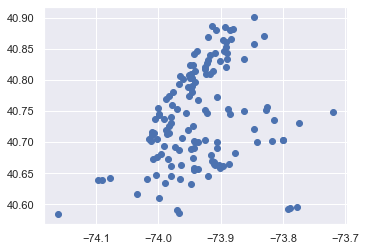

In [22]:
gdf_market.plot()

In [23]:
mapa = folium.Map(lat_lon_new_york,
                  zoom_start=11,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(gdf_market.to_json())

mapa.add_children(points)
mapa

In [24]:
gdf_market.Borough.value_counts()

Brooklyn         44
Manhattan        41
Bronx            27
Queens           22
Staten Island     4
Name: Borough, dtype: int64

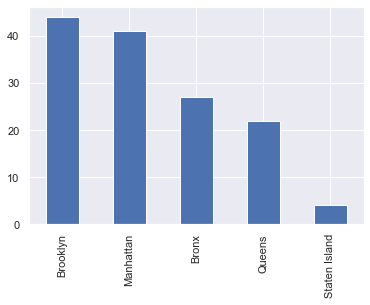

In [25]:
gdf_market.Borough.value_counts().plot(kind='bar')

# FourSqare

In [26]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        headers = {'Accept': 'application/json'}
            
        # make the GET request
        results = requests.get(url, headers=headers).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
CLIENT_ID, CLIENT_SECRET = open('../data/foursquare_config', 'r+').readline().split(',')
VERSION = '20180605' # Foursquare API version

In [29]:
df_venues = getNearbyVenues(names=gdf_ny['name'],
                            latitudes=gdf_ny['Latitude'],
                            longitudes=gdf_ny['Longitude']
                           )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [30]:
df_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [31]:
df_venues.groupby('Neighborhood').size()

Neighborhood
Allerton          27
Annadale          16
Arden Heights      4
Arlington          7
Arrochar          18
                ... 
Woodhaven         22
Woodlawn          24
Woodrow           19
Woodside          75
Yorkville        100
Length: 301, dtype: int64

In [32]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reindex(gdf_ny.name).fillna(0).reset_index()
df_grouped

,name,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Wakefield,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,Co-op City,0.0,0.058824,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Eastchester,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Fieldston,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,Riverdale,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Hudson Yards,0.0,0.000000,0.0,0.0,0.000000,0.0,0.051724,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017241,0.0,0.0
302,Hammels,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
303,Bayswater,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
304,Queensbridge,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [228]:
restaurant_related_categories = [
    c for c in df_grouped.columns 
    if (
        ('Restaurant ' in c) or ('BBQ ' in c) or ('Bagel' in c) or ('Bakery' in c) or ('Bar ' in c) or ('Buffet' in c) or ('Bistro' in c) or ('Burrito' in c) or
        ('Burger ' in c) or ('Bubble Tea ' in c) or ('Café' in c) or ('Cafeteria' in c) or ('Breakfast' in c) or ('Candy' in c) or ('Chocolate' in c) or ('Coffee' in c) or
        ('Donut ' in c) or ('Beer ' in c) or ('Cheese' in c) or ('Cupcake' in c) or ('Fish ' in c) or ('Food ' in c) or ('Dessert' in c) or ('Diner' in c) or ('Farmer' in c) or
        ('Hot Dog ' in c) or ('Ice Cream ' in c) or ('Irish Pub' in c) or ('Chicken' in c) or ('Yogurt' in c) or ('Fruit' in c) or ('Pie ' in c) or ('Pizza' in c) or ('Poke' in c) or
        ('Vegan ' in c) or ('Smoothie' in c) or ('Steak' in c) or ('Wings' in c) or ('Taco ' in c)
    ) and (('Market' not in c))
]

In [229]:
# one hot encoding
temp = df_venues[df_venues['Venue Category'].isin(restaurant_related_categories)]
df_onehot = pd.get_dummies(temp[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = temp['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Neighborhood,BBQ Joint,Bagel Shop,Bakery,Beer Bar,Beer Garden,Beer Store,Bistro,Breakfast Spot,Bubble Tea Shop,...,Pet Café,Pie Shop,Pizza Place,Poke Place,Smoothie Shop,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,Co-op City,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [230]:
df_onehot.groupby('Neighborhood').sum().sum(1)

Neighborhood
Allerton         10
Annadale          4
Arden Heights     2
Arlington         1
Arrochar          3
                 ..
Woodhaven         4
Woodlawn          6
Woodrow           6
Woodside         20
Yorkville        24
Length: 270, dtype: int64

In [231]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reindex(gdf_ny.name).fillna(0).reset_index()
# df_grouped['total_restaurant_count'] = df_onehot.groupby('Neighborhood').sum().sum(1).reindex(gdf_ny.name).fillna(0).reset_index(drop=True)

In [232]:
df_grouped.head()

,name,BBQ Joint,Bagel Shop,Bakery,Beer Bar,Beer Garden,Beer Store,Bistro,Breakfast Spot,Bubble Tea Shop,...,Pet Café,Pie Shop,Pizza Place,Poke Place,Smoothie Shop,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,Wakefield,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Co-op City,0.0,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Eastchester,0.0,0.00,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fieldston,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Riverdale,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
df_grouped.describe().loc['max'].sort_values()

Mac & Cheese Joint                 0.035714
Hot Dog Joint                      0.052632
Food Stand                         0.052632
Chocolate Shop                     0.066667
Cheese Shop                        0.080000
Burrito Place                      0.083333
Pet Café                           0.090909
Poke Place                         0.090909
Pie Shop                           0.090909
Taco Place                         0.125000
College Cafeteria                  0.125000
Beer Store                         0.125000
Fish & Chips Shop                  0.142857
Beer Bar                           0.142857
Buffet                             0.142857
Frozen Yogurt Shop                 0.166667
Health Food Store                  0.200000
Wings Joint                        0.200000
Fruit & Vegetable Store            0.250000
Steakhouse                         0.250000
Smoothie Shop                      0.333333
Southern / Soul Food Restaurant    0.333333
BBQ Joint                       

# Clustering

In [234]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped.drop('name', 1))

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 1, 1, 1, 0, 3, 3, 1])

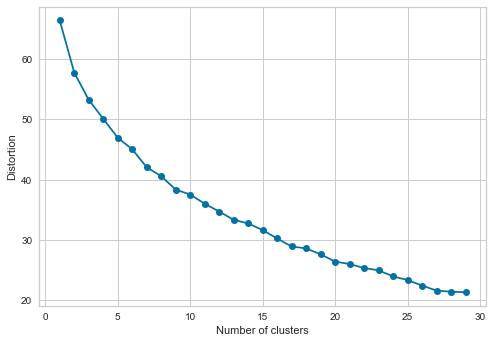

In [235]:
distortions = []
for i in range(1, 30):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=200,
        tol=1e-1, random_state=0,
        algorithm='full'
    )
    km.fit(df_grouped.drop('name', 1))
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

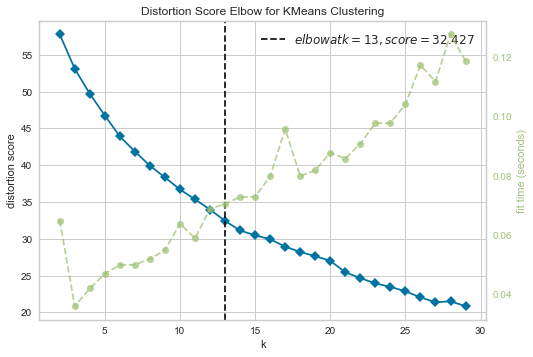

In [237]:
# Instantiate the clustering model and visualizer
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,30))

visualizer.fit(df_grouped.drop('name', 1))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [238]:
# set number of clusters
kclusters = 13

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped.drop('name', 1))

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 6,  5,  1,  9, 12,  1,  4, 10,  3,  9])

In [239]:
gdf_ny.head()

,name,stacked,annoline1,annoline2,annoline3,annoangle,borough,geometry,Longitude,Latitude
0,Wakefield,1,Wakefield,None,None,0.0,Bronx,POINT (-73.84720 40.89471),-73.847201,40.894705
1,Co-op City,2,Co-op,City,None,0.0,Bronx,POINT (-73.82994 40.87429),-73.829939,40.874294
2,Eastchester,1,Eastchester,None,None,0.0,Bronx,POINT (-73.82781 40.88756),-73.827806,40.887556
3,Fieldston,1,Fieldston,None,None,0.0,Bronx,POINT (-73.90564 40.89544),-73.905643,40.895437
4,Riverdale,1,Riverdale,None,None,0.0,Bronx,POINT (-73.91259 40.89083),-73.912585,40.890834


In [240]:
# add clustering labels
df_clustering_results = df_grouped.copy()
df_clustering_results.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = gdf_ny.join(df_clustering_results.set_index('name'), on='name')

df_merged.head() # check the last columns!

,name,stacked,annoline1,annoline2,annoline3,annoangle,borough,geometry,Longitude,Latitude,...,Pet Café,Pie Shop,Pizza Place,Poke Place,Smoothie Shop,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,Wakefield,1,Wakefield,None,None,0.0,Bronx,POINT (-73.84720 40.89471),-73.847201,40.894705,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Co-op City,2,Co-op,City,None,0.0,Bronx,POINT (-73.82994 40.87429),-73.829939,40.874294,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Eastchester,1,Eastchester,None,None,0.0,Bronx,POINT (-73.82781 40.88756),-73.827806,40.887556,...,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fieldston,1,Fieldston,None,None,0.0,Bronx,POINT (-73.90564 40.89544),-73.905643,40.895437,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Riverdale,1,Riverdale,None,None,0.0,Bronx,POINT (-73.91259 40.89083),-73.912585,40.890834,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
# create map
map_clusters = folium.Map(location=lat_lon_new_york, zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['name'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [242]:
df_merged.columns

Index(['name', 'stacked', 'annoline1', 'annoline2', 'annoline3', 'annoangle',
       'borough', 'geometry', 'Longitude', 'Latitude', 'Cluster Labels',
       'BBQ Joint', 'Bagel Shop', 'Bakery', 'Beer Bar', 'Beer Garden',
       'Beer Store', 'Bistro', 'Breakfast Spot', 'Bubble Tea Shop', 'Buffet',
       'Burger Joint', 'Burrito Place', 'Cafeteria', 'Café', 'Candy Store',
       'Cheese Shop', 'Chocolate Shop', 'Coffee Shop', 'College Cafeteria',
       'Comfort Food Restaurant', 'Cupcake Shop', 'Dessert Shop', 'Diner',
       'Donut Shop', 'Fast Food Restaurant', 'Fish & Chips Shop',
       'Food & Drink Shop', 'Food Court', 'Food Stand', 'Food Truck',
       'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Fruit & Vegetable Store',
       'Health Food Store', 'Hot Dog Joint', 'Ice Cream Shop', 'Irish Pub',
       'Mac & Cheese Joint', 'Pet Café', 'Pie Shop', 'Pizza Place',
       'Poke Place', 'Smoothie Shop', 'Southern / Soul Food Restaurant',
       'Steakhouse', 'Taco Place', 'Veget

In [243]:
df_merged.groupby('Cluster Labels').agg({c: 'mean' for c in restaurant_related_categories})

,BBQ Joint,Bagel Shop,Bakery,Beer Bar,Beer Garden,Beer Store,Bistro,Breakfast Spot,Bubble Tea Shop,Buffet,...,Pet Café,Pie Shop,Pizza Place,Poke Place,Smoothie Shop,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.024744,0.228051,0.003157,0.000000,0.000000,0.004046,0.007486,0.001488,0.004149,...,0.000000,0.000000,0.252970,0.000000,0.000000,0.008705,0.005637,0.013639,0.015278,0.004406
2,0.032435,0.059238,0.121634,0.005342,0.004570,0.005838,0.002232,0.005058,0.027659,0.000000,...,0.004947,0.000000,0.105347,0.004570,0.000000,0.001984,0.011293,0.004104,0.029872,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.917857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.014183,0.040263,0.077293,0.009119,0.006086,0.002538,0.002805,0.012168,0.008920,0.000000,...,0.000576,0.003275,0.156317,0.002814,0.000000,0.003942,0.026540,0.017370,0.018772,0.005088
5,0.012642,0.020437,0.027183,0.000000,0.000000,0.000000,0.000000,0.015079,0.000000,0.005032,...,0.000000,0.000000,0.088136,0.000000,0.011905,0.006519,0.000000,0.002551,0.000000,0.014796
6,0.000000,0.063805,0.062058,0.000000,0.002988,0.000000,0.001587,0.007738,0.005357,0.000000,...,0.000000,0.000000,0.175897,0.000000,0.000000,0.000000,0.031135,0.001832,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [244]:
df_merged['Cluster Labels'].value_counts()

4     62
9     48
6     42
1     42
10    29
5     28
2     28
11    10
3     10
0      7
8      4
12     2
7      2
Name: Cluster Labels, dtype: int64

In [250]:
for i in range(kclusters):
    print(i, sum(df_merged['Cluster Labels'] == i))
    display(df_merged[df_merged['Cluster Labels'] == i][restaurant_related_categories].mean().sort_values(ascending=False).head(10))

    # create map
    map_clusters = folium.Map(location=lat_lon_new_york, zoom_start=11)

    # add markers to the map
    markers_colors = []
    for lat, lon, poi in zip(
        df_merged[df_merged['Cluster Labels'] == i]['Latitude'], 
        df_merged[df_merged['Cluster Labels'] == i]['Longitude'], 
        df_merged[df_merged['Cluster Labels'] == i]['name']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7).add_to(map_clusters)
        
    display(map_clusters)

0 7


Coffee Shop                0.714286
Pizza Place                0.214286
Fast Food Restaurant       0.071429
Wings Joint                0.000000
Burrito Place              0.000000
Cupcake Shop               0.000000
Comfort Food Restaurant    0.000000
College Cafeteria          0.000000
Chocolate Shop             0.000000
Cheese Shop                0.000000
dtype: float64

1 42


Pizza Place             0.252970
Bakery                  0.228051
Diner                   0.114333
Donut Shop              0.073000
Coffee Shop             0.042214
Ice Cream Shop          0.039533
Fast Food Restaurant    0.034575
Burger Joint            0.031406
Bagel Shop              0.024744
Café                    0.022157
dtype: float64

2 28


Café                             0.261224
Bakery                           0.121634
Pizza Place                      0.105347
Coffee Shop                      0.078920
Ice Cream Shop                   0.063866
Bagel Shop                       0.059238
Burger Joint                     0.034198
BBQ Joint                        0.032435
Vegetarian / Vegan Restaurant    0.029872
Bubble Tea Shop                  0.027659
dtype: float64

3 10


Pizza Place                0.917857
Diner                      0.039286
Donut Shop                 0.014286
Fast Food Restaurant       0.014286
Coffee Shop                0.014286
Cafeteria                  0.000000
Cupcake Shop               0.000000
Comfort Food Restaurant    0.000000
College Cafeteria          0.000000
Chocolate Shop             0.000000
dtype: float64

4 62


Coffee Shop       0.243169
Pizza Place       0.156317
Bakery            0.077293
Café              0.074506
Ice Cream Shop    0.056530
Bagel Shop        0.040263
Burger Joint      0.036548
Donut Shop        0.036063
Steakhouse        0.026540
Diner             0.023497
dtype: float64

5 28


Fast Food Restaurant    0.326842
Fried Chicken Joint     0.136969
Donut Shop              0.112454
Pizza Place             0.088136
Diner                   0.051560
Ice Cream Shop          0.034165
Bakery                  0.027183
Food & Drink Shop       0.026531
Food Truck              0.023980
Coffee Shop             0.021867
dtype: float64

6 42


Donut Shop             0.301103
Pizza Place            0.175897
Ice Cream Shop         0.093101
Bagel Shop             0.063805
Bakery                 0.062058
Coffee Shop            0.045443
Fried Chicken Joint    0.035932
Steakhouse             0.031135
Café                   0.029434
Dessert Shop           0.026587
dtype: float64

7 2


Fried Chicken Joint        1.0
Wings Joint                0.0
Diner                      0.0
Cupcake Shop               0.0
Comfort Food Restaurant    0.0
College Cafeteria          0.0
Coffee Shop                0.0
Chocolate Shop             0.0
Cheese Shop                0.0
Candy Store                0.0
dtype: float64

8 4


Donut Shop                       0.916667
Cafeteria                        0.083333
Vegetarian / Vegan Restaurant    0.000000
Dessert Shop                     0.000000
Cupcake Shop                     0.000000
Comfort Food Restaurant          0.000000
College Cafeteria                0.000000
Coffee Shop                      0.000000
Chocolate Shop                   0.000000
Cheese Shop                      0.000000
dtype: float64

9 48


Dessert Shop                       0.037136
Breakfast Spot                     0.034165
Burger Joint                       0.029266
Fried Chicken Joint                0.024303
Bistro                             0.023438
Beer Garden                        0.020833
Bubble Tea Shop                    0.015997
Candy Store                        0.014489
Southern / Soul Food Restaurant    0.012665
Bakery                             0.011326
dtype: float64

10 29


Pizza Place             0.449299
Ice Cream Shop          0.092080
Fried Chicken Joint     0.061627
Donut Shop              0.045241
Breakfast Spot          0.042347
Food & Drink Shop       0.041379
Bagel Shop              0.041343
Diner                   0.036162
Food Court              0.034483
Fast Food Restaurant    0.027379
dtype: float64

11 10


Bagel Shop                 0.494762
Pizza Place                0.339048
Burger Joint               0.050000
Food Truck                 0.033333
Ice Cream Shop             0.028571
Candy Store                0.020000
Dessert Shop               0.020000
Fast Food Restaurant       0.014286
Cafeteria                  0.000000
Comfort Food Restaurant    0.000000
dtype: float64

12 2


Food Truck                 1.0
Wings Joint                0.0
Diner                      0.0
Cupcake Shop               0.0
Comfort Food Restaurant    0.0
College Cafeteria          0.0
Coffee Shop                0.0
Chocolate Shop             0.0
Cheese Shop                0.0
Candy Store                0.0
dtype: float64